In [2]:
from datetime import datetime

now = datetime.now()
now

datetime.datetime(2017, 12, 1, 18, 23, 33, 238542)

In [3]:
now.year, now.month, now.day

(2017, 12, 1)

In [4]:
delta = datetime(2017, 11, 6) - datetime(1977, 2, 7, 8, 15)
delta

datetime.timedelta(14881, 56700)

In [5]:
delta.days

14881

In [6]:
delta.seconds

56700

In [7]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [8]:
start-2*timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [10]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [11]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [16]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [17]:
from dateutil.parser import parse


In [20]:
parse('2011-1-3')


datetime.datetime(2011, 1, 3, 0, 0)

In [21]:
parse('Jan 31, 1977 10:45 PM')


datetime.datetime(1977, 1, 31, 22, 45)

In [26]:
parse('6/12/2011', dayfirst=False)


datetime.datetime(2011, 6, 12, 0, 0)

In [28]:
import pandas as pd
pd.to_datetime(datestrs)


DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [29]:
pd.to_datetime(datestrs)
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [33]:
from pandas import Series, DataFrame
import numpy as np


In [38]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = Series(np.random.randn(6), index=dates)
ts

2011-01-02    1.285237
2011-01-05    1.470443
2011-01-07   -0.678205
2011-01-08    0.034813
2011-01-10    2.036963
2011-01-12    0.142714
dtype: float64

In [39]:
type(ts)

pandas.core.series.Series

In [40]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [41]:
ts+ts[::2]

2011-01-02    2.570474
2011-01-05         NaN
2011-01-07   -1.356410
2011-01-08         NaN
2011-01-10    4.073925
2011-01-12         NaN
dtype: float64

In [42]:
ts.index.dtype

dtype('<M8[ns]')

In [43]:
ts.index[0]

Timestamp('2011-01-02 00:00:00')

In [46]:
longer_ts = Series(np.random.randn(1000),
                   index=pd.date_range('1/1/2000', periods=1000))
longer_ts['2001-5']

2001-05-01   -0.468650
2001-05-02   -0.618989
2001-05-03   -1.321984
2001-05-04    0.258594
2001-05-05    0.376517
2001-05-06    1.668398
2001-05-07    0.868866
2001-05-08   -1.819082
2001-05-09   -1.627279
2001-05-10   -0.716959
2001-05-11   -0.489756
2001-05-12    0.619044
2001-05-13   -0.655163
2001-05-14    0.843396
2001-05-15   -0.448238
2001-05-16   -0.584379
2001-05-17   -0.097504
2001-05-18   -2.682057
2001-05-19    0.041871
2001-05-20    0.198014
2001-05-21   -0.750892
2001-05-22    0.262628
2001-05-23    1.148127
2001-05-24   -0.264904
2001-05-25   -1.446735
2001-05-26   -0.588010
2001-05-27    0.972622
2001-05-28    0.816398
2001-05-29   -1.268157
2001-05-30   -1.361062
2001-05-31   -0.815901
Freq: D, dtype: float64

In [47]:
ts

2011-01-02    1.285237
2011-01-05    1.470443
2011-01-07   -0.678205
2011-01-08    0.034813
2011-01-10    2.036963
2011-01-12    0.142714
dtype: float64

In [50]:
ts1=ts.resample('D')

In [51]:
ts1

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [60]:
close_px_all = pd.read_csv('stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B', fill_method='ffill')

e:\python34\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  app.launch_new_instance()


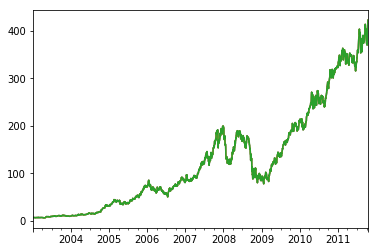

In [63]:
import matplotlib.pyplot as plt

close_px['AAPL'].plot()
plt.show()

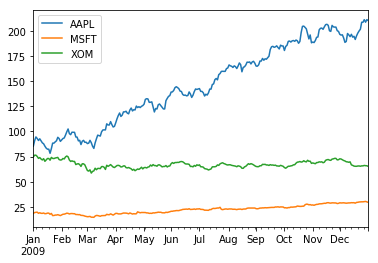

In [65]:
close_px.loc['2009'].plot()
plt.show()

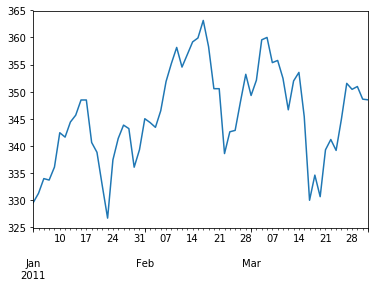

In [67]:
close_px['AAPL'].loc['2011-1': '2011-3'].plot()
plt.show()

e:\python34\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  if __name__ == '__main__':


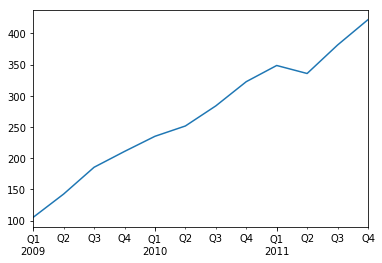

In [69]:
appl_q = close_px['AAPL'].resample('Q-DEC', fill_method='ffill')
appl_q.loc['2009':].plot()
plt.show()